<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ingest" data-toc-modified-id="Ingest-1">Ingest</a></span></li><li><span><a href="#Inspect-and-Clean" data-toc-modified-id="Inspect-and-Clean-2">Inspect and Clean</a></span><ul class="toc-item"><li><span><a href="#Examine-the-diabetes_inspect-data-(df)" data-toc-modified-id="Examine-the-diabetes_inspect-data-(df)-2.1">Examine the diabetes_inspect data (df)</a></span><ul class="toc-item"><li><span><a href="#Dropping-columns-and-rows" data-toc-modified-id="Dropping-columns-and-rows-2.1.1">Dropping columns and rows</a></span></li><li><span><a href="#Looking-for-duplicates" data-toc-modified-id="Looking-for-duplicates-2.1.2">Looking for duplicates</a></span></li><li><span><a href="#Looking-for-missing-values" data-toc-modified-id="Looking-for-missing-values-2.1.3">Looking for missing values</a></span></li><li><span><a href="#Imputing-missing-values" data-toc-modified-id="Imputing-missing-values-2.1.4">Imputing missing values</a></span></li><li><span><a href="#Using-visuals-to-get-a-sense-of-the-data" data-toc-modified-id="Using-visuals-to-get-a-sense-of-the-data-2.1.5">Using visuals to get a sense of the data</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-1---20-minutes" data-toc-modified-id="Exercise-1---20-minutes-3">Exercise 1 - 20 minutes</a></span></li></ul></div>

# Ingest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from numpy.random import randn

In [ ]:
df = pd.read_csv('/Users/jimcody/Documents/2021Python/intropython/data/diabetes_inspect.csv',
                index_col = 'encounter_id')
df.head()

# Inspect and Clean

## Examine the diabetes_inspect data (df)

Things to look for:



- Is there inconsistent data?
  - Are there values spelled differently that are really the same?
  - Are there values that need to be modified?
  - Is the data consistently coded for a variable?
  
- Do data types need to change?
- Are there any columns with missing values?  Can we impute missing values?
- Are there any rows that are duplicated?
- Can distribution plots help identify any 'oddities'?
- Are there outliers?  Are they legitimate data points?
- Is there unnecessary data?



In [ ]:
# A cursory look at the data
df.shape

In [ ]:
# Are we ok with the data types?
df.info()

In [ ]:
# Change a value for an entire column
df.loc[:,'discharge_disposition_id'] = 99   
df.loc[64410] = 99   # Change a value for an entire row
df.head()


In [ ]:
df = pd.read_csv('/Users/jimcody/Documents/2021Python/intropython/data/diabetes_inspect.csv',
                index_col = 'encounter_id').reset_index()
df.head()

In [ ]:
# Only change some rows - first find the row to change
# df.loc[if the test is True then what is the index of...]

x = df.loc[df.admission_type_id == 1,'admission_type_id']
x

# Notice that the first row is not listed (2278392)

In [ ]:
# Change/Fix some of the data values

df.loc[df.admission_type_id == 1,'admission_type_id']=100
df.loc[df.gender == 'M','gender']='Male'
df.head()

In [ ]:
# Change/Fix some of the data values

df['gender'] = df['gender'].replace({'M':'Male', 'Mle':'Male', 'F':'Female'})
df.head()

In [ ]:
# Inconsistent capitalization
# Apply a function along an axis of the DataFrame.

df['gender'] = df['gender'].apply(lambda x:x.lower())
df.head()

In [ ]:
# Change data type

df = df.astype({'encounter_id': str, 'patient_nbr': str})
df.info()

In [ ]:
# Change data type

df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df.info()

# vaccines['series_complete_pop_pct'] = pd.to_numeric(vaccines['series_complete_pop_pct']).astype(int)


In [ ]:
# Rename a few columns

short_names = {'admission_type_id':'admin_type', # creating a dict of the names to be changed
               'discharge_disposition_id':'discharge_dispo',
               'admission_source_id':'admin_source',
               'num_lab_procedures':'lab_procedures',
               'num_procedures':'procedures'}

df.rename(columns=short_names, inplace=True) # passing the dict to the rename method
                                             # inplace=True
df.info()

######## Appendix A has an explanation of 'inplace'

### Dropping columns and rows

In [ ]:
# Remove a single column
df = df.drop('payer_code',axis=1)  # Axis=1 means drop the column
df = df.drop('weight',axis=1)  

# inplace=True not used so columns still exist. Just not in this instance.  
# Fix that.
# Remove multiple columns

# glyburide-metformin       
# glipizide-metformin       
# glimepiride-pioglitazone

drop_columns = {'medical_specialty','glyburide-metformin','glipizide-metformin',
                'glimepiride-pioglitazone'}
df = df.drop(columns = drop_columns) # inplace=True not used so columns still exist. 
                                     # Just not in this instance.

# Delete by selecting rows not equal to the condition
df = df.loc[df['age']!= 'xyz']
df = df.loc[df.gender != '?']
#df = df.loc[df['gender']!='?']
#df.shape

no_age = df[df['age'].isnull()].index
df = df.drop(no_age, axis = 0)   # axis = 0 means drop the row
df.shape
             

In [ ]:
df['payer_code'].nunique()

In [ ]:
df['payer_code'].unique()

In [ ]:
df['payer_code'].value_counts()

### Looking for duplicates

In [ ]:
df.shape

In [ ]:
# checking for duplicates
df.loc[df.duplicated()]

In [ ]:
# This will drop all duplicate rows

df.drop_duplicates(keep = 'first', inplace = True) 

# keep - which duplicate to keep, default is none!

df.loc[df.duplicated()]

In [ ]:
df.shape

### Looking for missing values

In [ ]:
# Just listing the columns and how many rows 
# for each have a missing value.

df.isnull().sum()

In [ ]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

**Note:** num_medications is numeric with missing values.  This will need to be fixed before using it.

In [ ]:
# Plotting missing values

sns.heatmap(df.isnull(), cbar=False)

### Imputing missing values

In [ ]:
df['num_medications'].describe()

In [ ]:
df['num_medications'].median()

In [ ]:
df['num_medications'].mode()

In [ ]:
# Fill missing values of num_medications with the average of num_medications (mean)

#df[ 'num_medications' ] = df.num_medications.fillna( df.num_medications.mean() )

df.num_medications.fillna( df.num_medications.mean(),inplace=True )
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

# Can be filled with an arbitrary number
# df.num_medications.fillna( 101,inplace=True )

# backward, forward ->  df.fillna(method='bfill') , df.fillna(method='ffill')

In [ ]:
df[ 'num_medications' ]

### Using visuals to get a sense of the data

In [55]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admin_type,discharge_dispo,admin_source,time_in_hospital,lab_procedures,...,A1Cresult,metformin,glimepiride,glipizide,glyburide,tolbutamide,miglitol,insulin,diabetesMed,readmitted
2,64410,86047875,AfricanAmerican,female,[20-30),100,1,7,2,11,...,None,No,No,Steady,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,male,[30-40),100,1,7,2,44,...,None,No,No,No,No,No,No,Up,Yes,NO
4,16680,42519267,Caucasian,male,[40-50),100,1,7,1,51,...,None,No,No,Steady,No,No,No,Steady,Yes,NO
5,35754,82637451,Caucasian,male,[50-60),2,1,2,3,31,...,None,No,No,No,No,No,No,Steady,Yes,>30
6,55842,84259809,Caucasian,male,[60-70),3,1,2,4,70,...,None,Steady,Steady,No,No,No,No,Steady,Yes,NO


In [56]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admin_type',
       'discharge_dispo', 'admin_source', 'time_in_hospital', 'lab_procedures',
       'procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'miglitol', 'insulin', 'diabetesMed', 'readmitted'],
      dtype='object')

In [58]:
df.num_medications.describe()

count    101763.000000
mean         16.022161
std           8.127472
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

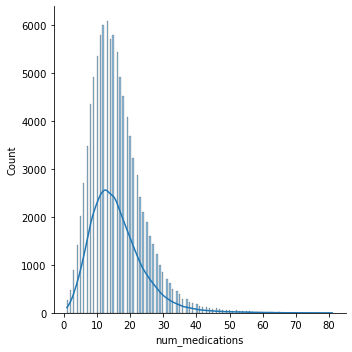

In [59]:
# Plot a histogram of BMI
sns.displot(df['num_medications'], kde = True)

<AxesSubplot:ylabel='num_medications'>

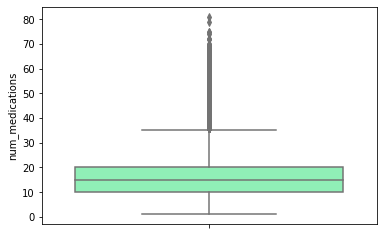

In [60]:
# Basic boxplot
sns.boxplot(y="num_medications", data=df,palette='rainbow')

<AxesSubplot:xlabel='gender', ylabel='num_medications'>

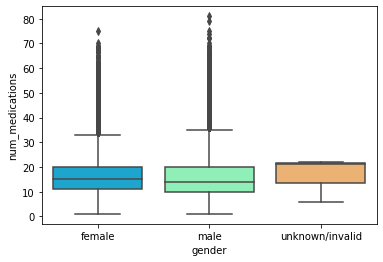

In [61]:
# Boxplot stratified by carbody
sns.boxplot(x='gender', y='num_medications', data=df,palette='rainbow')

<AxesSubplot:xlabel='A1Cresult', ylabel='num_medications'>

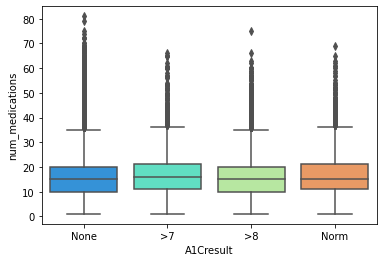

In [62]:
# Boxplot stratified by carbody
sns.boxplot(x='A1Cresult', y='num_medications', data=df,palette='rainbow')

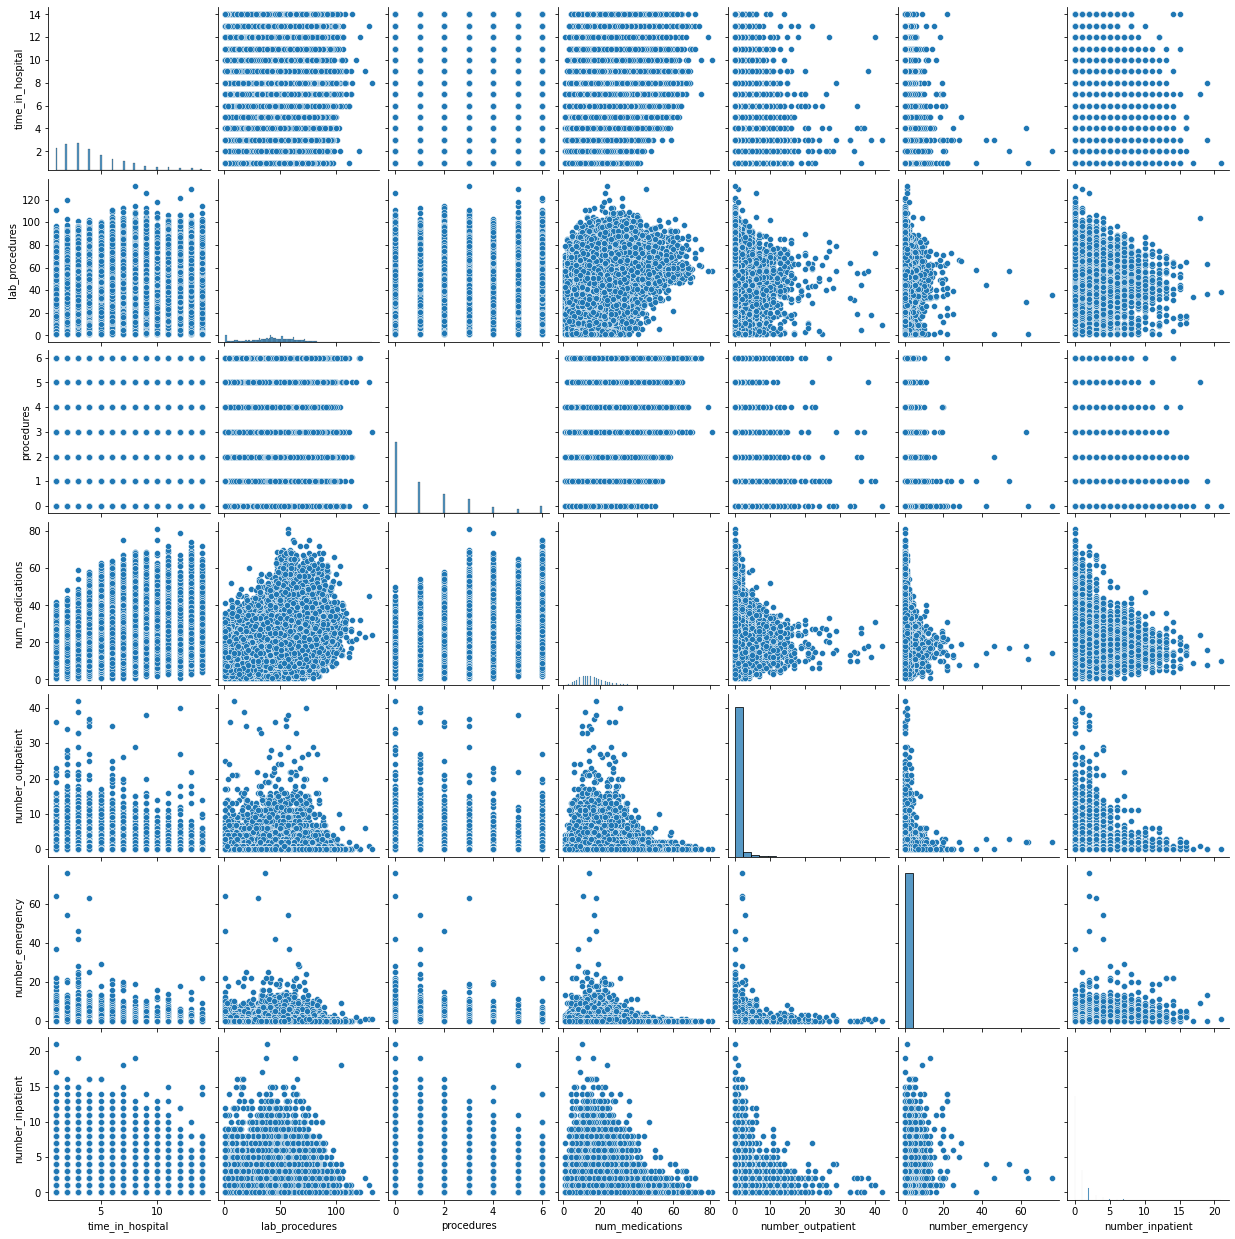

In [63]:
sns.pairplot(df)

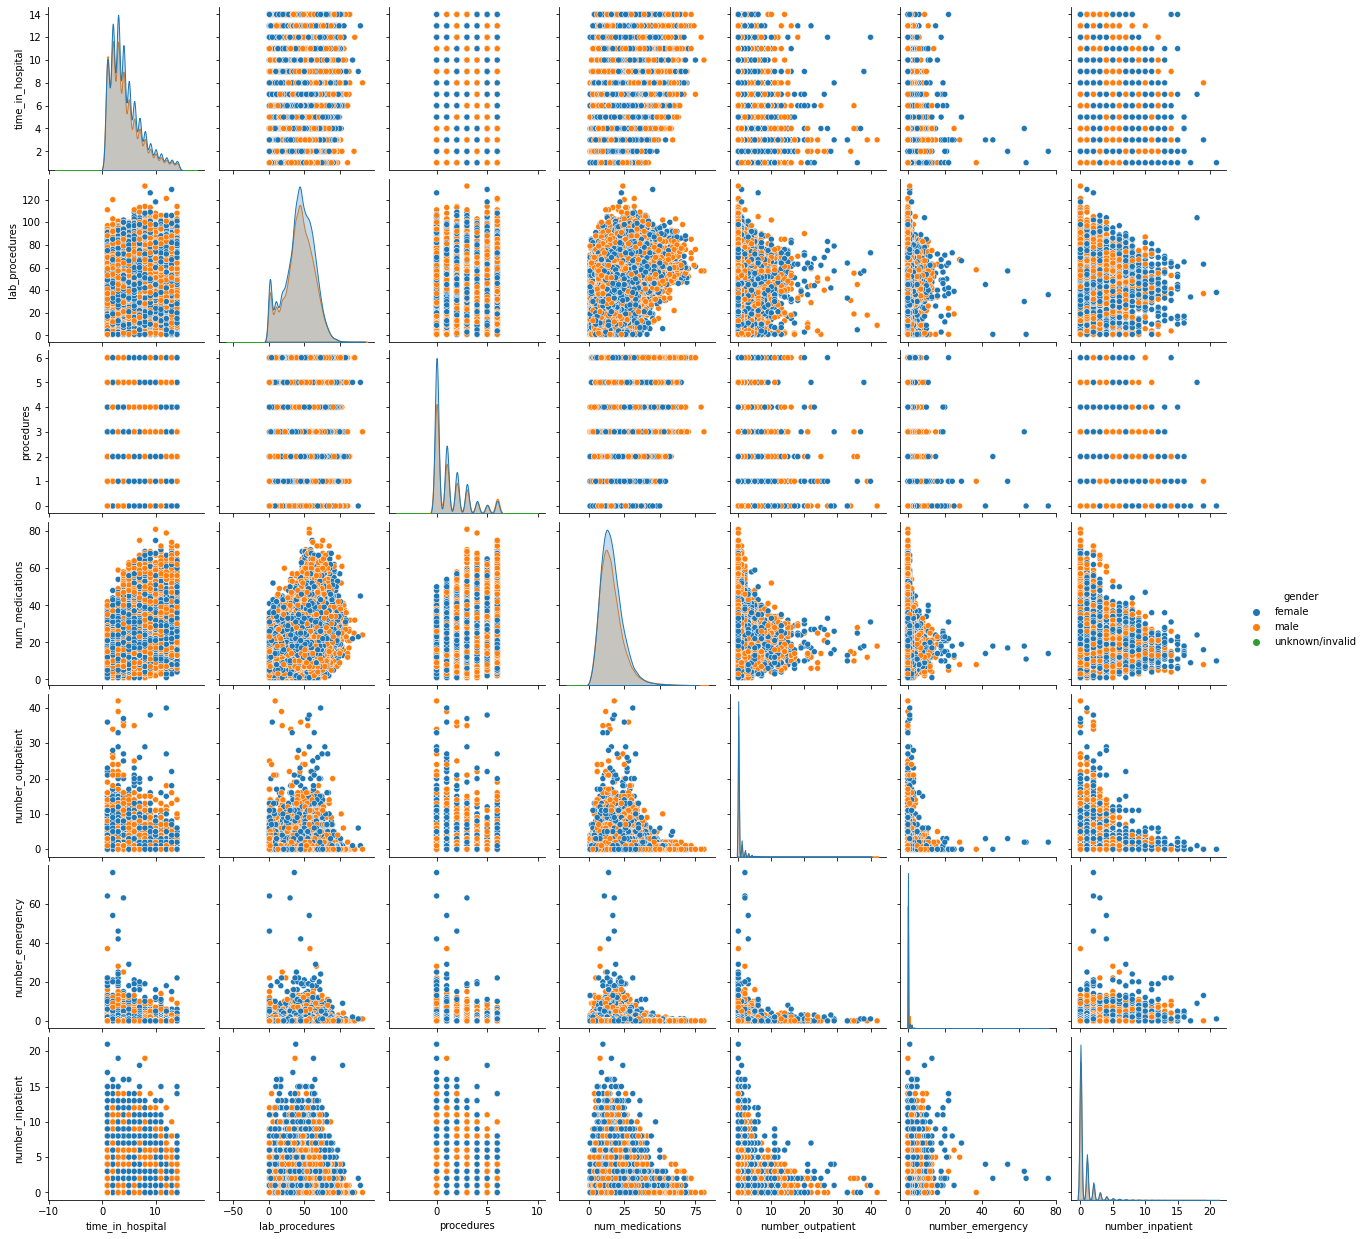

In [64]:
sns.pairplot(df, hue = 'gender')

In [66]:
# Calculate correlations
corr = df.corr()
corr

,time_in_hospital,lab_procedures,procedures,num_medications,number_outpatient,number_emergency,number_inpatient
time_in_hospital,1.000000,0.318450,0.191470,0.466129,-0.008918,-0.009683,0.073620
lab_procedures,0.318450,1.000000,0.058079,0.268160,-0.007598,-0.002276,0.039240
procedures,0.191470,0.058079,1.000000,0.385762,-0.024826,-0.038185,-0.066249
num_medications,0.466129,0.268160,0.385762,1.000000,0.045187,0.013173,0.064177
number_outpatient,-0.008918,-0.007598,-0.024826,0.045187,1.000000,0.091457,0.107334
number_emergency,-0.009683,-0.002276,-0.038185,0.013173,0.091457,1.000000,0.266557
number_inpatient,0.073620,0.039240,-0.066249,0.064177,0.107334,0.266557,1.000000


<AxesSubplot:title={'center':'Quantitative Variables Correlation'}>

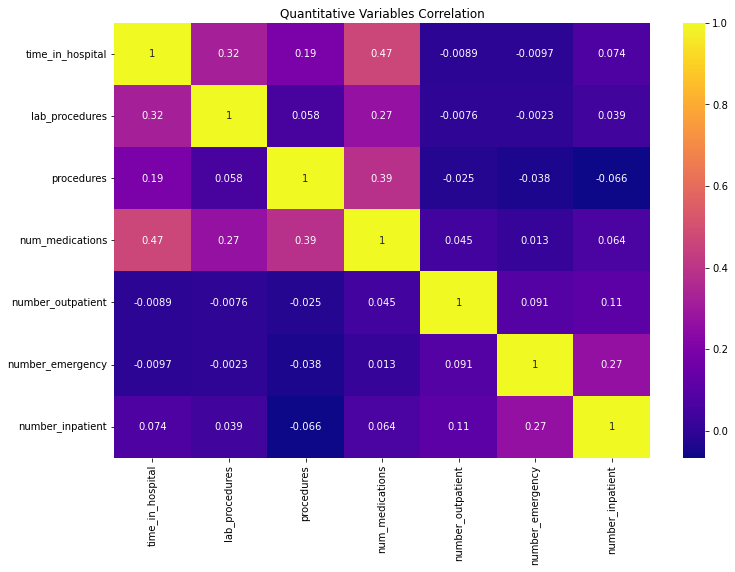

In [67]:
# Heatmap
plt.figure(figsize=(12,8))
plt.title('Quantitative Variables Correlation')
sns.heatmap(corr,cmap='plasma',annot=True)

<AxesSubplot:>

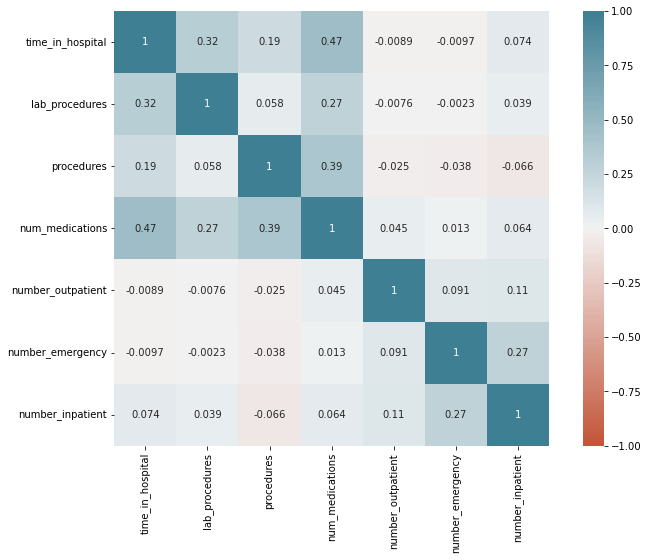

In [68]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size":10}
)

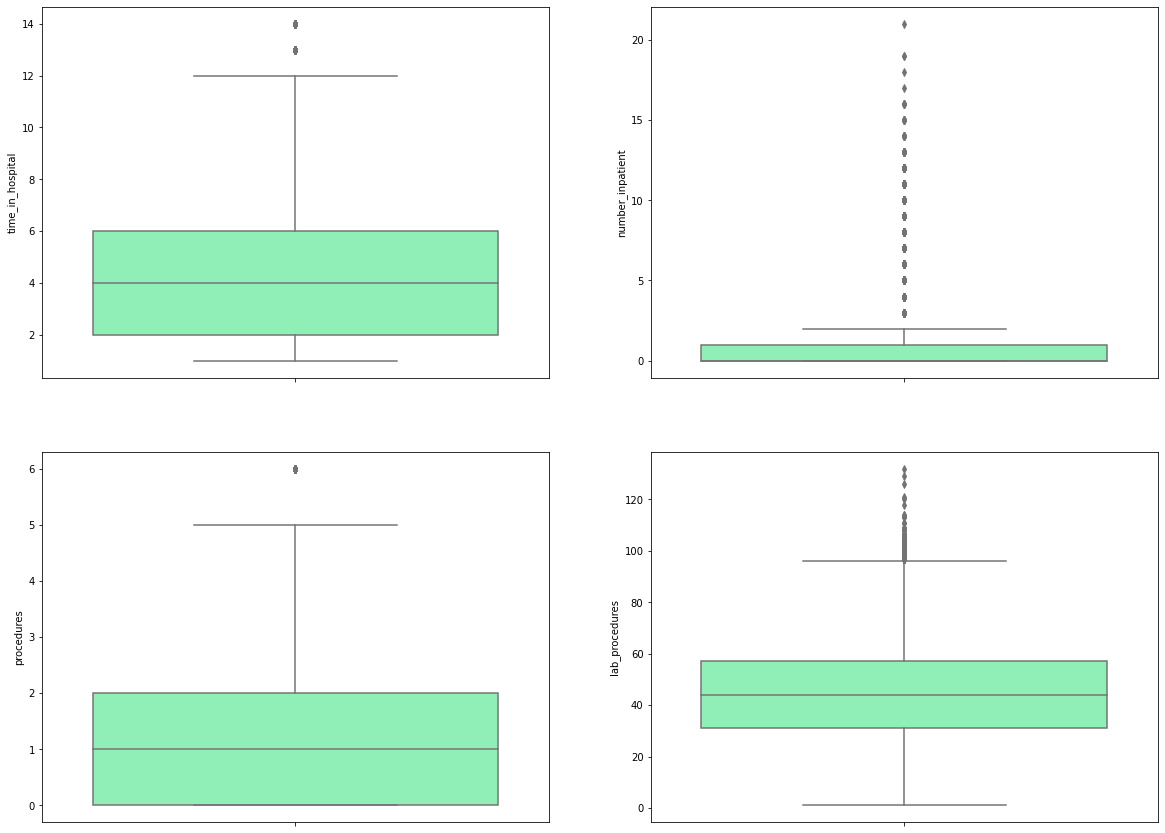

In [75]:
# Multiple boxplots
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(y="time_in_hospital", data=df,palette='rainbow')
plt.subplot(2,2,2)
sns.boxplot(y="number_inpatient", data=df,palette='rainbow')
plt.subplot(2,2,3)
sns.boxplot(y="procedures", data=df,palette='rainbow')
plt.subplot(2,2,4)
sns.boxplot(y="lab_procedures", data=df,palette='rainbow')

plt.show()

# Exercise 1 - 20 minutes